# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0


network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=13371)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

Reading SNUDDA_DATA=None from networks/pair_recording_simulation/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/pair_recording_simulation/network-synapses.hdf5


In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

Reading SNUDDA_DATA=None from networks/pair_recording_simulation/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/pair_recording_simulation/network-synapses.hdf5
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 20/64 (13 neurons)
Processing hyper voxel : 5/64 (13 neurons)
Processing hyper voxel : 17/64 (13 neurons)
Processing hyper voxel : 21/64 (13 neurons)
Processing hyper voxel : 16/64 (11 neurons)
Processing hyper voxel : 1/64 (8 neurons)
Processing hyper voxel : 4/64 (8 neurons)
Processing hyper voxel : 37/64 (8 neurons)
Processing hyper voxel : 22/64 (7 neurons)
Processing hyper voxel : 18/64 (7 neurons)
Processing hyper voxel : 33/64 (6 neurons)
Processing hyper voxel : 25/64 (6 neurons)
Processing hyper voxel : 0/64 (5 neurons)
Processing hyper voxel : 36/64 (4 neurons)
Processing hyper voxel : 38/64 (3 neurons)
Processing hyper voxel : 24/64 (2 neurons)
Processing hyper voxel : 32/64 (2 neurons

In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 2128 out of total 2128 synapses
Read 61 out of total 61 gapJunctions


In [6]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listN

Loading 13 neurons with 255 synapses and 23 gap junctions
Neurons in network: 
0 : iSPN_2 [0] (x: 0.004782, y: 0.003984, z: 0.007735)
1 : dSPN_2 [0] (x: 0.004772, y: 0.003998, z: 0.007736)
2 : dSPN_3 [0] (x: 0.004780, y: 0.003992, z: 0.007767)
3 : iSPN_0 [0] (x: 0.004777, y: 0.004019, z: 0.007747)
4 : FS_3 [0] (x: 0.004759, y: 0.004009, z: 0.007754)
5 : dSPN_1 [0] (x: 0.004758, y: 0.003988, z: 0.007773)
6 : FS_2 [0] (x: 0.004786, y: 0.004006, z: 0.007774)
7 : LTS_0 [0] (x: 0.004776, y: 0.003991, z: 0.007784)
8 : iSPN_1 [0] (x: 0.004769, y: 0.004006, z: 0.007778)
9 : FS_1 [0] (x: 0.004744, y: 0.004021, z: 0.007764)
10 : dSPN_0 [0] (x: 0.004742, y: 0.004000, z: 0.007779)
11 : FS_0 [0] (x: 0.004756, y: 0.004029, z: 0.007772)
12 : iSPN_3 [0] (x: 0.004741, y: 0.003976, z: 0.007787)


We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

In [7]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-7.json](../../snudda/data/experiment_config/pair_recording/experiment-config-7.json) file.

In [8]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "pair_recording", "experiment-config-7.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)

Pair recording output file: networks/pair_recording_simulation/simulation/network-output-7.hdf5
Reading SNUDDA_DATA=None from networks/pair_recording_simulation/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Empty modFile field for ChIN -> dSPN synapses. This channel is IGNORED.
Empty modFile field for ChIN -> iSPN synapses. This channel is IGNORED.
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/modulation.json


/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:83: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '


Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs/str-fs-e180418_FS5-mMTC251001A-IDB-v20190301/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/modulation.json
Warning! No

In [9]:
pr.run()

Running simulation for 4.0 s
Running Neuron simulator 4000 ms, with dt=0.025
1% done. Elapsed: 3.0 s, estimated time left: 299.8 s
36% done. Elapsed: 105.3 s, estimated time left: 187.1 s
71% done. Elapsed: 206.6 s, estimated time left: 84.4 s
Neuron simulation finished
Simulation run time: 290.8 s
Writing network output to networks/pair_recording_simulation/simulation/network-output-7.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to networks/pair_recording_simulation/simulation/network-output-7.hdf5


## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Plotting traces: [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 12 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Network-voltage-trace-Example7-FS-LTS-dSPN-iSPN.pdf


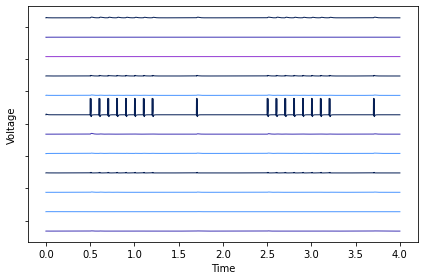

In [17]:
%matplotlib inline
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [0]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-0.pdf


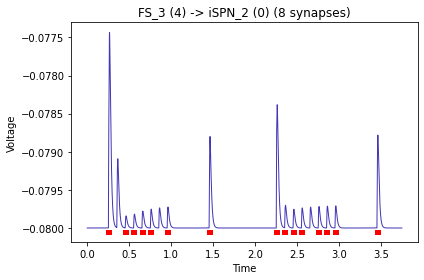

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-1.pdf


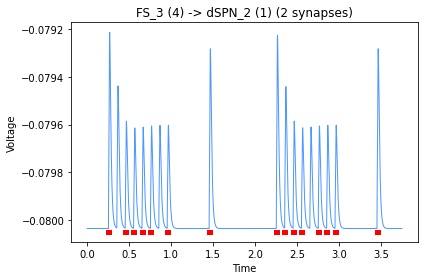

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-2.pdf


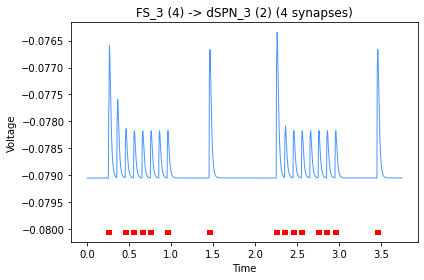

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [3]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-3.pdf


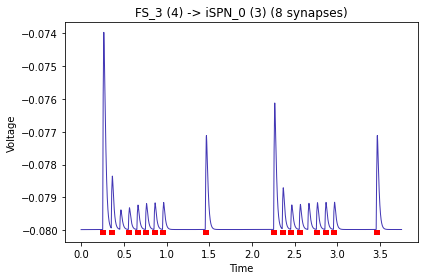

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [5]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-5.pdf


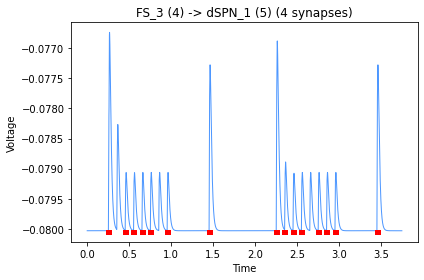

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-6.pdf


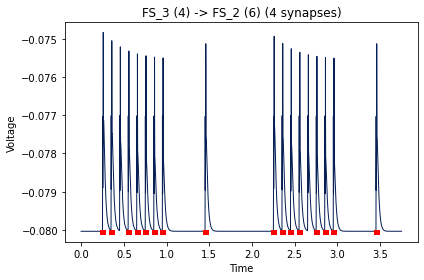

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-7.pdf


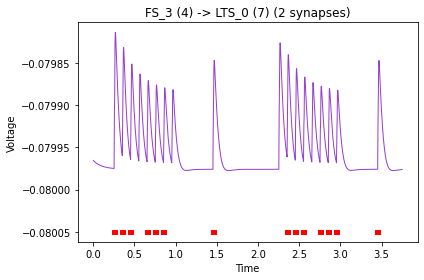

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [8]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-8.pdf


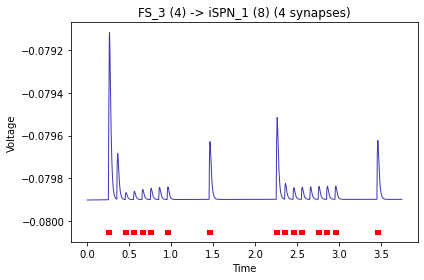

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [9]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-9.pdf


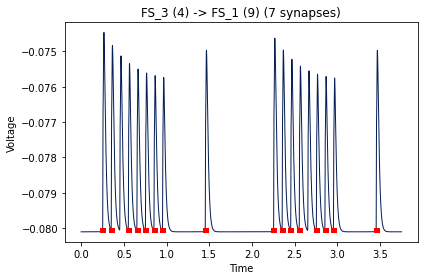

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [10]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-10.pdf


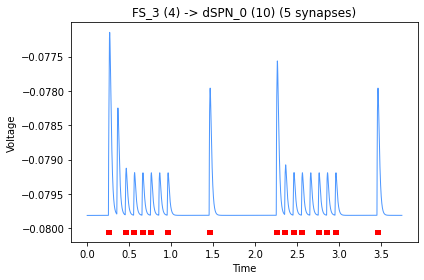

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-11.pdf


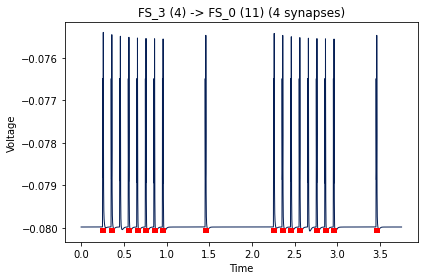

In [18]:
%matplotlib inline
pr.plot_traces()

Skipping trace 0, not in trace_id=[11]
Skipping trace 1, not in trace_id=[11]
Skipping trace 2, not in trace_id=[11]
Skipping trace 3, not in trace_id=[11]
Skipping trace 5, not in trace_id=[11]
Skipping trace 6, not in trace_id=[11]
Skipping trace 7, not in trace_id=[11]
Skipping trace 8, not in trace_id=[11]
Skipping trace 9, not in trace_id=[11]
Skipping trace 10, not in trace_id=[11]
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 12)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-11.pdf


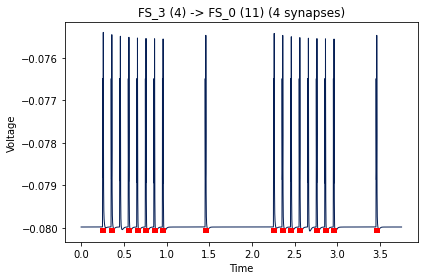

In [19]:
pr.plot_traces(trace_id=[11])

In [20]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPre 11

Loading 13 neurons with 255 synapses and 23 gap junctions
List neurons pre-synaptic to neuronID = 11 (FS_0)
The neuron receives 6 synapses
4 : FS_3 (4 synapses)
9 : FS_1 (2 synapses)


### Plotting synaptic currents

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


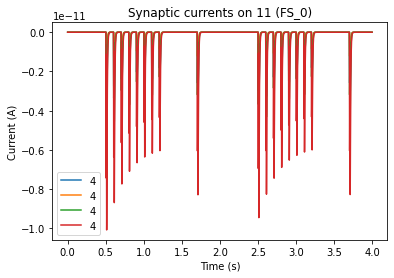

<Figure size 432x288 with 0 Axes>

In [21]:
pr.plot_synaptic_currents(post_id=11)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


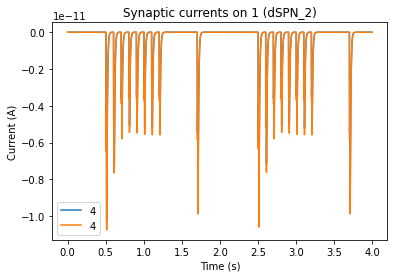

<Figure size 432x288 with 0 Axes>

In [22]:
pr.plot_synaptic_currents(post_id=1)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 255 synapses and 23 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


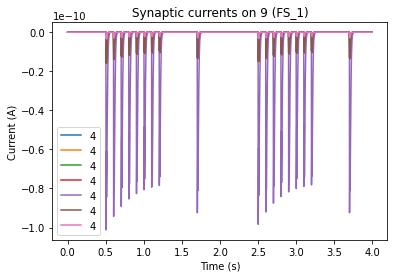

<Figure size 432x288 with 0 Axes>

In [23]:
pr.plot_synaptic_currents(post_id=9)